

---

# **Módulo** | Análise de Dados: Séries Temporais


---

# **Tópicos**

<ol type="1">
  <li>Introdução;</li>
  <li>Wrangling;</li>
  <li>Decomposição.</li>
</ol>

---

# **Exercícios**

## 1\. Correlação entre consumo de energia elétrica e temperatura

Neste exercício, vamos correlacionar a base de dados de consumo de energia elétrica vista em aula com uma base de dados de temperatura média das tres maiores cidades do sudeste: **São Paulo**, **Rio de Janeiro** e **Belo Horizonte**. Os dados de temperatura estão presente neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv) e foram extraídos diretamento do [site](https://portal.inmet.gov.br) do instituto nacional de meteorologias (INMTE), órgão do governo vinculado ao ministério de agricultura, pecuária e abastecimento.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

### **1.1. Energia** 

Carregue os dados de **energia** com o código abaixo e responda as perguntas abaixo:

In [3]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/energia.csv' -O 'energia.csv'

In [5]:
energia = pd.read_csv('energia.csv', sep=';', parse_dates=[0], infer_datetime_format=True)

In [6]:
energia.head()

,referencia,residencial,industrial,comercial
0,2004-01-01,3694386,6977471,2450453
1,2004-02-01,3511541,7084623,2396965
2,2004-03-01,3629455,7087613,2402521
3,2004-04-01,3733863,7384540,2580914
4,2004-05-01,3537269,7258307,2344084


In [7]:
energia.tail()

,referencia,residencial,industrial,comercial
199,2020-08-01,5671487,7697947,3198269
200,2020-09-01,5756787,7723167,3431649
201,2020-10-01,6241392,8042503,3890202
202,2020-11-01,5999235,7878699,3718647
203,2020-12-01,6377972,7832769,3965809


Responda:

 - Qual é a granularidade da base de dados: **?**
 A granulidade se trata da nossa referência, a data de janeiro de 2004 até dezembro de 2020. Todo o nosso conunto de dados passa por esse intervalo.
 - Qual é o intervalo de tempo (min/max): **?**
 O intervalo de tempo mínimo é de mês a mês. 1 . O intervalo máximo é do ínicio (Janeiro de 2004) até o fim (Dezembro de 2020). 202

### **1.2. Temperatura** 

Carregue os dados de **temperatura** com o código abaixo e responda as perguntas abaixo:

In [8]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv' -O 'temperatura.csv'

In [9]:
temperatura = pd.read_csv('temperatura.csv', sep=';', parse_dates=[0], infer_datetime_format=True)

In [10]:
temperatura.head()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
0,2018-07-15,18,21.0,19.0
1,2018-07-16,19,23.0,19.0
2,2018-07-17,17,21.0,19.0
3,2018-07-18,18,23.0,19.0
4,2018-07-19,19,23.0,19.0


In [12]:
temperatura.tail()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
896,2020-12-27,20,24.0,23.0
897,2020-12-28,21,25.0,23.0
898,2020-12-29,22,27.0,23.0
899,2020-12-30,24,27.0,23.0
900,2020-12-31,23,29.0,24.0


Responda:

 - Qual é a granularidade da base de dados: **?**
  A granulidade se trata da nossa referência, a data de 15 de Julho de 2018 até 31 de Dezembro de 2020. Todo o nosso conunto de dados passa por esse intervalo.
 - Qual é o intervalo de tempo (min/max): **?**
 Mínimo -> de dia a dia. 1. Máximo -> do dia 2018-07-15	até 2020-12-31. 899

## 2\. Processamento 

### **2.1. Energia** 

Processe o dataframe `energia`:

 - **a.** Atributa ao index a coluna temporal.

In [13]:
# resposta da questão 2.1.a

energia = energia.set_index(keys=['referencia'])

energia.head()

,residencial,industrial,comercial
referencia,,,
2004-01-01,3694386,6977471,2450453
2004-02-01,3511541,7084623,2396965
2004-03-01,3629455,7087613,2402521
2004-04-01,3733863,7384540,2580914
2004-05-01,3537269,7258307,2344084


 - **b.** Selecione apenas os dados entre 2019 e 2020.

In [14]:
# resposta da questão 2.1.b

energiaNew = energia['2019':'2020']

print(energiaNew)
energiaNew.shape

            residencial  industrial  comercial
referencia                                    
2019-01-01      6389714     7545071    4370412
2019-02-01      6188834     7285407    4365504
2019-03-01      6072327     7556147    4303463
2019-04-01      5610278     7494816    4115920
2019-05-01      5785412     7597072    4141319
2019-06-01      5269701     7384031    3726296
2019-07-01      5152318     7434149    3547092
2019-08-01      5201820     7485988    3575392
2019-09-01      5376428     7411807    3768173
2019-10-01      5668331     7616449    4084436
2019-11-01      5967916     7523365    4293625
2019-12-01      5682864     7086548    4194166
2020-01-01      6159441     7075128    4229304
2020-02-01      5890217     7341090    4191409
2020-03-01      5894607     7587633    4072869
2020-04-01      5678228     6503650    3318789
2020-05-01      5426561     6357406    2982078
2020-06-01      5400703     6477439    2860468
2020-07-01      5496332     7279626    3015118
2020-08-01   

(24, 3)

 > **Atenção:** O seu dataframe final deve conter 24 linhas. Utilize o atributo `shape` para conferir.

### **2.2. Temperatura** 

Processe o dataframe `temperatura`:

 - **a.** Atributa ao index a coluna temporal.

In [15]:
# resposta da questão 2.2.a

temperatura = temperatura.set_index(keys=['referencia'])

temperatura.head()


,temp-media-sp,temp-media-rj,temp-media-mg
referencia,,,
2018-07-15,18,21.0,19.0
2018-07-16,19,23.0,19.0
2018-07-17,17,21.0,19.0
2018-07-18,18,23.0,19.0
2018-07-19,19,23.0,19.0


 - **b.** Selecione apenas os dados entre 2019 e 2020.

In [16]:
# resposta da questão 2.1.b

temperaturaNew = temperatura['2019':'2020']

print(temperaturaNew)
temperaturaNew.shape

            temp-media-sp  temp-media-rj  temp-media-mg
referencia                                             
2019-01-01             22           28.0           21.0
2019-01-02             25           28.0           24.0
2019-01-03             26           31.0           24.0
2019-01-04             23           31.0           22.0
2019-01-05             21           28.0           23.0
...                   ...            ...            ...
2020-12-27             20           24.0           23.0
2020-12-28             21           25.0           23.0
2020-12-29             22           27.0           23.0
2020-12-30             24           27.0           23.0
2020-12-31             23           29.0           24.0

[731 rows x 3 columns]


(731, 3)

 - **c.** Remova todas as linhas que apresentem pelo menos um valores nulo.

In [17]:
# resposta da questão 2.2.c

temperaturaNew.info() #-> há valores nuloes em temp-media-rj e temp-media-mg 


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2019-01-01 to 2020-12-31
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temp-media-sp  731 non-null    int64  
 1   temp-media-rj  644 non-null    float64
 2   temp-media-mg  724 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 22.8 KB


In [18]:
temperaturaNew = temperaturaNew.dropna(subset=["temp-media-rj", "temp-media-mg"], axis=0)

temperaturaNew.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 643 entries, 2019-01-01 to 2020-12-31
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temp-media-sp  643 non-null    int64  
 1   temp-media-rj  643 non-null    float64
 2   temp-media-mg  643 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 20.1 KB


 - **d.** Combine as três colunas de temperatura em uma só chamada de `temp-media` e agregadas pela **média** (obtendo assim uma temperatura média aproximada da região sudeste). 

In [19]:
# resposta da questão 2.2.d

temperaturaNew['temp-media'] = temperaturaNew.mean(numeric_only=True, axis=1)

temperaturaNew.head()

,temp-media-sp,temp-media-rj,temp-media-mg,temp-media
referencia,,,,
2019-01-01,22,28.0,21.0,23.666667
2019-01-02,25,28.0,24.0,25.666667
2019-01-03,26,31.0,24.0,27.000000
2019-01-04,23,31.0,22.0,25.333333
2019-01-05,21,28.0,23.0,24.000000


 - **f.** Reamostre o dataframe para que sua granularidade seja a mesma dos dados de consumo de energia elétrica. Utilize a **média** como métrica de agregação. 

In [20]:
# resposta da questão 2.2.f

#granularidade de energia elétrica é de mês em mês. Da temperatura é de dia em dia. Agregar para mês em mês de referência

resampled = temperaturaNew.resample(rule='m').mean()

print(resampled)
resampled.shape

            temp-media-sp  temp-media-rj  temp-media-mg  temp-media
referencia                                                         
2019-01-31      24.000000      29.774194      24.483871   26.086022
2019-02-28      21.928571      27.464286      23.571429   24.321429
2019-03-31      21.258065      26.645161      23.032258   23.645161
2019-04-30      20.833333      26.066667      22.600000   23.166667
2019-05-31      19.161290      24.193548      21.225806   21.526882
2019-06-30      17.600000      22.800000      19.333333   19.911111
2019-07-31      15.580645      21.096774      18.193548   18.290323
2019-08-31      16.032258      20.935484      20.129032   19.032258
2019-09-30      18.333333      22.766667      23.100000   21.400000
2019-10-31      19.967742      24.870968      23.967742   22.935484
2019-11-30      19.266667      24.433333      23.000000   22.233333
2019-12-31      20.806452      26.064516      22.741935   23.204301
2020-01-31      21.677419      26.870968      23

(24, 4)

 > **Atenção:** O seu dataframe final deve conter 24 linhas. Utilize o atributo `shape` para conferir.

## 3\. Correlação 

### **3.1. Consumo residencial** 

 - **a.** Gere um gráfico de linha para a série temporal de **temperatura** média agregada `temp-media`.

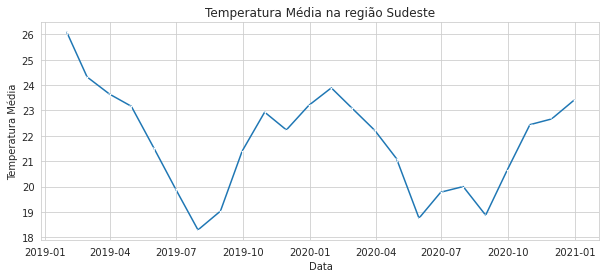

In [21]:
# resposta da questão 3.1.b

with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=resampled, x='referencia', y='temp-media', marker="1", palette="pastel")
  grafico.set(title='Temperatura Média na região Sudeste', ylabel='Temperatura Média', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

 - **b.** Gere um gráfico de linha para a série temporal do consumo de energia **residencial**.

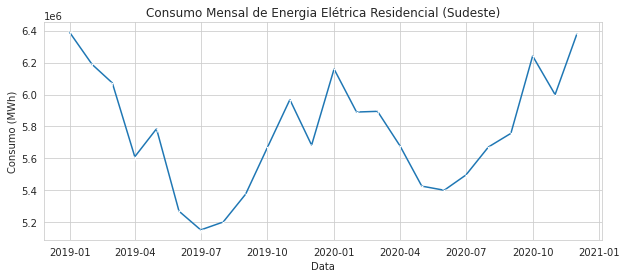

In [22]:
# resposta da questão 3.1.b

with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=energiaNew, x='referencia', y='residencial', marker="1", palette="pastel")
  grafico.set(title='Consumo Mensal de Energia Elétrica Residencial (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

 - **c.** Utilize o método `corrcoef` do pacote Numpy para calcular o coeficiente de Pearson entre o consumo de energia elétrica **residencial** e a **temperatura** média agregada `temp-media`.

In [23]:
# resposta da questão 3.1.c

pearson = np.corrcoef(energiaNew['residencial'], resampled['temp-media'])

print(pearson)

[[1.         0.82427182]
 [0.82427182 1.        ]]


 - **d.** Baseado nas respostas dos items anteriores, responda: A temperatura é um bom atributo para prever o consumo de energia elétrica **residencial**?



**Resposta:** Sim, pois quanto maior a temperatura, maior o consumo de energia elétrica. Há de se notar que nos meses mais quentes como Janeiro e Fevereiro o consumo de energia elétrica é consideravelmente maior que meses mais frios como Junho e Julho.

### **3.2. Consumo comercial** 

Repita o exercício 3.1. para dados de consumo de energia elétrica **comercial**.

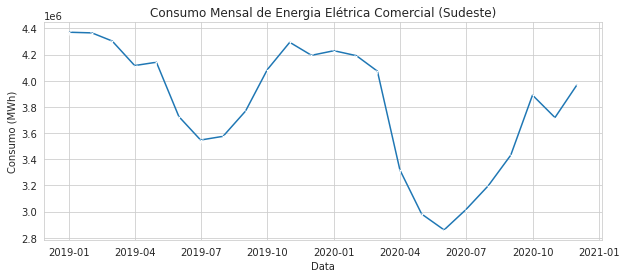

In [24]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=energiaNew, x='referencia', y='comercial', marker="1", palette="pastel")
  grafico.set(title='Consumo Mensal de Energia Elétrica Comercial (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

In [25]:
pearson = np.corrcoef(energiaNew['comercial'], resampled['temp-media'])

print(pearson)

[[1.         0.82350289]
 [0.82350289 1.        ]]


Note que nos estabelecimentos comerciais, o consumo no geral também é maior nos meses mais quentes assim como nos residenciais. Porém os estabeleccimentos comerciais tiveram um corte de energia muito grande durante a metade de 2020. Isso provavelmente se deve a Pandemia, em que muitos estabelecimentos tiveram que se manter fechados devido as regras de isolamento.

### **3.3. Consumo industrial** 

Repita o exercício 3.1. para dados de consumo de energia elétrica **industrial**.

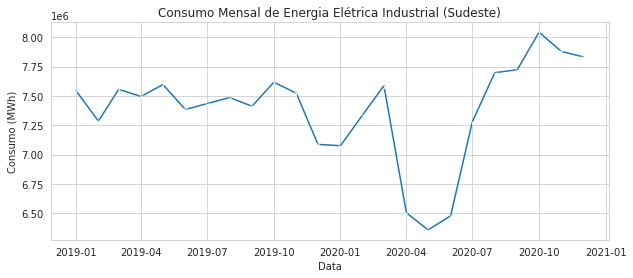

In [26]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=energiaNew, x='referencia', y='industrial', marker="1", palette="pastel")
  grafico.set(title='Consumo Mensal de Energia Elétrica Industrial (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

In [27]:
pearson = np.corrcoef(energiaNew['industrial'], resampled['temp-media'])

print(pearson)

[[1.         0.28732297]
 [0.28732297 1.        ]]


No caso da energia elétrica industrial, diferente da energia residencial e comercial, ela segue um padrão bem diferente da temperatura (como é mostrado pela correlação de pearson acima.). Indústrias continuam funcionando independente se estiver quente ou frio.
Entretanto assim como o caso da energia comercial, houve uma queda massiva durante a metade de 2020. Provavelmente devido a Pandemia e as regras de isolamento. Muitas indústrias tiveram que adaptar as novas regras e vacinar seus funcionários e uma vez feito, eles retornaram para seus postos e assim o consumo de energia elétrica voltou a crescer como indica o gráfico.

---